In [24]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist
import custom_lexicon
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the AMC data
cleaned_comments = pd.read_pickle("../reddit_data/AMC_data/AMC.pkl")
cleaned_comments

['amc',
 'thing',
 'like',
 'fuck',
 've',
 'bought',
 'gme',
 '$150.',
 'aapl',
 'alright',
 'thread',
 'lost',
 'amc',
 'drop',
 'looks',
 'natural',
 'kardashian',
 'bone',
 'structure',
 'gme',
 'holding',
 'strong',
 'nice',
 'gme',
 'going',
 'outer',
 'banks',
 'stratosphere',
 'allright',
 '4',
 '15',
 'going',
 'glorious',
 'gmerection',
 'fly',
 'gme',
 'fly',
 'come',
 'gme',
 'thing',
 'apple',
 '30',
 'year',
 'pump',
 'dump',
 'crying_face',
 'bought',
 '5',
 'gmes',
 'continuing',
 'averaging',
 'easy',
 'money',
 'green',
 'don',
 't',
 'matter',
 '9',
 'poor',
 'aapl',
 'forced',
 'spend',
 'day',
 'short',
 'bus',
 'special',
 'kids',
 'love',
 'aapl',
 'day',
 'makes',
 'sense',
 'amc',
 'gain',
 'friday',
 'monday',
 'release',
 'weekend',
 'box',
 'office',
 'numbers',
 'course',
 'break',
 'records',
 'past',
 '2',
 'years',
 'great',
 'gain',
 'monday',
 'guys',
 'gme',
 'pretty',
 'affordable',
 'm',
 'buying',
 'opening',
 'comes',
 'friday',
 'dump',
 'apes',


In [3]:
# Initialise vader sentiment analyser


new_words = custom_lexicon.wsbfinancial_jargon

SIA = SentimentIntensityAnalyzer()

SIA.lexicon.update(new_words)


In [4]:
# Polarity Score of Words
results = []

for comments in cleaned_comments:
        pol_score = SIA.polarity_scores(comments)
        pol_score['words'] = comments
        results.append(pol_score)
        
df = pd.DataFrame.from_records(results)
df.head(100)

,neg,neu,pos,compound,words
0,0.0,1.0,0.0,0.0000,amc
1,0.0,1.0,0.0,0.0000,thing
2,0.0,0.0,1.0,0.3612,like
3,1.0,0.0,0.0,-0.5423,fuck
4,0.0,1.0,0.0,0.0000,ve
...,...,...,...,...,...
95,0.0,0.0,1.0,0.6124,buying
96,0.0,1.0,0.0,0.0000,opening
97,0.0,1.0,0.0,0.0000,comes
98,0.0,1.0,0.0,0.0000,friday


In [31]:
# Create a new column
# Categorize them into positive, negative and neutral words based on its compound score
# Print "sentiment label" for each word
df['sent_label'] = 0
df.loc[df['compound'] >= 0.05, 'sent_label'] = 1
df.loc[df['compound'] <= -0.05, 'sent_label'] = -1
df
print(df.sent_label.value_counts())
print(df.sent_label.value_counts(normalize=True) * 100)

 0    2839
 1     404
-1     263
Name: sent_label, dtype: int64
 0    80.975471
 1    11.523103
-1     7.501426
Name: sent_label, dtype: float64


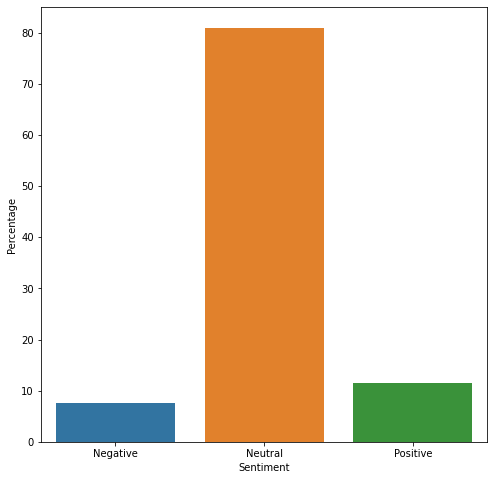

In [32]:
# create a bar chart
fig, ax = plt.subplots(figsize=(8,8))
counts = df.sent_label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_xlabel("Sentiment")
ax.set_ylabel("Percentage")

plt.show()

In [41]:
# Most common positive words vs. negative words
positive_comments = list(df.loc[df['sent_label'] == 1].words)
pcomments_frequency = FreqDist(positive_comments)
pos_freq = pcomments_frequency.most_common(20)

negative_comments = list(df.loc[df['sent_label'] == -1].words)
ncomments_frequency = FreqDist(negative_comments)
neg_freq = ncomments_frequency.most_common(20)

print("The 20 most common positive words that were used in these comments are :",pos_freq )
print()
print("The 20 most common negative words that were used in these comments are :",neg_freq )


The 20 most common positive words that were used in these comments are : [('like', 28), ('rocket', 18), ('buy', 16), ('squeeze', 13), ('want', 13), ('good', 12), ('holding', 10), ('popular', 10), ('buying', 9), ('calls', 9), ('pump', 8), ('play', 8), ('moon', 7), ('shares', 7), ('yes', 6), ('hold', 6), ('gain', 5), ('better', 5), ('profit', 5), ('value', 5)]

The 20 most common negative words that were used in these comments are : [('shit', 22), ('sell', 14), ('puts', 8), ('lose', 7), ('fuck', 6), ('dump', 6), ('short', 5), ('stop', 5), ('loss', 5), ('bad', 5), ('crazy', 5), ('drop', 4), ('low', 4), ('lost', 3), ('damn', 3), ('sick', 3), ('risk', 3), ('wtf', 3), ('pay', 3), ('shorts', 3)]
